In [51]:
from leecarter import leecarter
import pandas as pd
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt

In [29]:
mortality = pd.read_csv('death_rates2.txt',delim_whitespace=True)
mortality = mortality[mortality['Age'] != '110+']
mortality['Age'] = mortality['Age'].astype(int)
mortality['Year'] = mortality['Year'].astype(int)
mortality = mortality[mortality['Age'] <= 100]
mortality['Female_l'] = np.log(mortality['Female'].astype(float))
mortality['Male_l'] = np.log(mortality['Male'].astype(float))
mortality['Total_l'] = np.log(mortality['Total'].astype(float))
mortality = mortality[['Year', 'Age', 'Female_l', 'Male_l', 'Total_l']]
mortality

,Year,Age,Female_l,Male_l,Total_l
0,1958,0,-2.723920,-2.480397,-2.591788
1,1958,1,-5.352562,-5.291540,-5.320972
2,1958,2,-6.357324,-6.197751,-6.272237
3,1958,3,-6.732962,-6.527266,-6.622576
4,1958,4,-7.066751,-6.837297,-6.943382
...,...,...,...,...,...
6867,2019,96,-1.240243,-1.143835,-1.220129
6868,2019,97,-1.123130,-1.046502,-1.108135
6869,2019,98,-1.127061,-0.963167,-1.093425
6870,2019,99,-0.980088,-0.864780,-0.957410


In [84]:
fm = mortality.pivot(index="Age", columns="Year", values='Female_l')
fm


Year,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Age,,,,,,,,,,,,,,,,,,,,,
0,-2.723920,-2.717661,-2.988618,-3.023844,-3.022302,-3.139880,-3.168991,-3.309868,-3.386526,-3.404513,...,-5.429110,-5.478641,-5.458017,-5.480079,-5.512501,-5.613302,-5.608654,-5.605114,-5.652424,-5.607836
1,-5.352562,-5.320767,-5.648159,-5.650716,-5.772811,-5.856584,-5.892162,-6.058459,-6.142753,-6.182625,...,-8.108400,-8.177156,-8.403865,-8.170064,-8.149084,-8.173603,-8.368773,-8.330714,-8.507243,-8.426439
2,-6.357324,-6.293651,-6.541031,-6.603954,-6.555691,-6.683812,-6.755893,-6.869497,-6.901773,-6.827097,...,-8.563237,-8.798231,-8.940313,-8.818298,-8.697517,-8.825078,-8.740337,-8.932709,-8.746606,-9.036387
3,-6.732962,-6.779362,-7.146012,-7.004266,-7.049319,-7.083300,-7.142213,-7.171721,-7.182192,-7.184827,...,-8.910236,-8.791630,-9.044826,-8.873868,-8.662219,-9.326874,-9.349602,-9.220391,-9.061920,-9.282911
4,-7.066751,-6.910760,-7.211567,-7.215640,-7.426949,-7.280269,-7.433695,-7.400414,-7.518401,-7.366621,...,-8.895530,-8.987197,-9.133379,-8.971323,-9.408791,-9.190538,-9.672376,-9.408791,-9.220391,-9.338174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-1.086027,-0.991106,-1.071805,-1.119380,-0.724015,-0.991206,-1.070521,-1.017377,-1.189258,-0.959895,...,-1.099048,-1.068254,-1.203013,-1.114105,-1.254789,-1.233072,-1.149841,-1.238654,-1.178698,-1.240243
97,-1.035756,-0.838939,-0.918656,-1.069710,-0.871074,-0.897916,-0.915034,-1.025141,-1.085834,-1.040415,...,-0.983176,-1.106997,-1.027253,-1.089074,-1.106607,-1.070538,-1.218437,-1.043954,-1.144139,-1.123130
98,-0.883301,-0.827673,-1.117560,-1.307542,-0.862959,-1.013603,-0.915171,-0.883853,-0.904814,-1.293270,...,-0.905155,-0.999246,-0.983152,-0.943731,-1.127864,-1.027605,-1.037270,-1.065322,-0.978714,-1.127061


In [85]:
fm = fm.to_numpy()

In [59]:
a_x = fm.mean(axis=1)
a_x

array([-4.26600432, -7.09237174, -7.70947509, -8.0124909 , -8.19038029,
       -8.33199109, -8.41339397, -8.50605903, -8.50889857, -8.63084819,
       -8.64578521, -8.66818677, -8.59429203, -8.52034921, -8.33661753,
       -8.19695043, -8.07462004, -7.98845139, -7.86670617, -7.84576455,
       -7.86710407, -7.8512019 , -7.84331949, -7.83214597, -7.775071  ,
       -7.76288668, -7.733019  , -7.65226824, -7.57106818, -7.50769289,
       -7.43695903, -7.36690331, -7.28992014, -7.20853052, -7.10964385,
       -7.02240755, -6.90247906, -6.84077559, -6.72591819, -6.61756029,
       -6.51845889, -6.43163792, -6.34181629, -6.22636855, -6.12486716,
       -6.03590663, -5.94498833, -5.8466665 , -5.75068674, -5.64886293,
       -5.56256602, -5.47346067, -5.39250029, -5.31009828, -5.2304255 ,
       -5.13867999, -5.04842324, -4.96337264, -4.87749764, -4.77663387,
       -4.67235999, -4.59251402, -4.50337194, -4.40775227, -4.31894826,
       -4.21822425, -4.11564359, -4.01325043, -3.91536073, -3.80

In [103]:
T = 62
N = 101
z_xt = fm - np.matlib.repmat(a_x, T, 1).T

In [76]:
U, S, V = np.linalg.svd(z_xt, full_matrices=True)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 62 is different from 101)

In [104]:
bxkt = S[0] * np.dot(U[:, 0].reshape(N, 1), V[0, :].reshape(T, 1).T)
eps = z_xt - bxkt

logm_xt_lcfitted = bxkt + a_x.reshape(N, 1)

b_x = U[:, 0]/U[:, 0].sum()
k_t = V[0, :]*S[0]*U[:, 0].sum()
a_x = a_x + k_t.sum()*b_x
k_t = k_t - k_t.sum()


In [110]:
# teraz arima
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(k_t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.050241
p-value: 0.734502


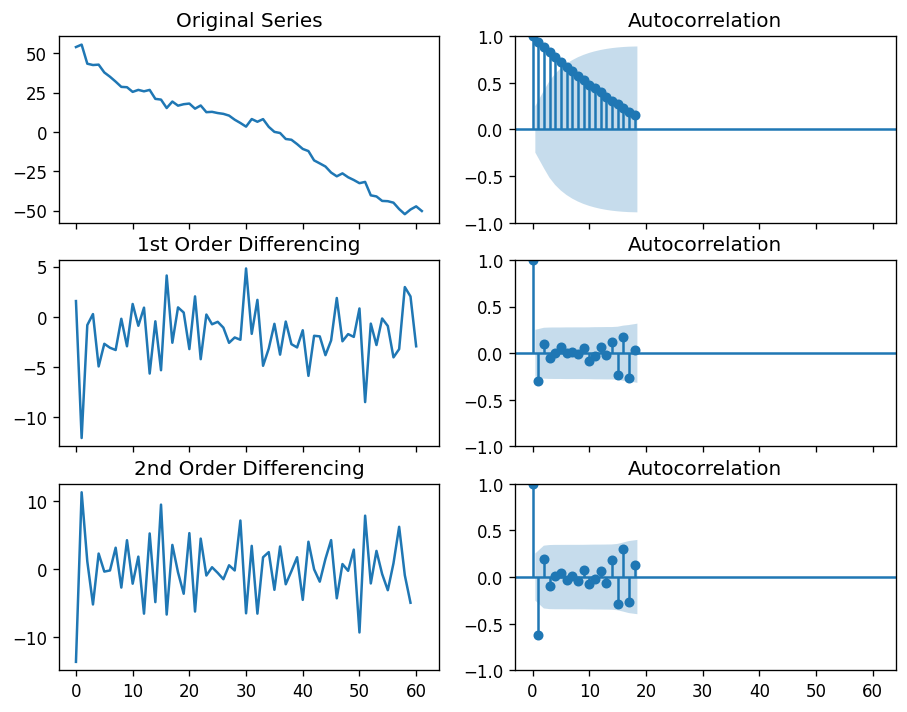

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(k_t); axes[0, 0].set_title('Original Series')
plot_acf(k_t, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(k_t)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(k_t), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(k_t))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(k_t)), ax=axes[2, 1])

plt.show()

In [118]:
from statsmodels.tsa.arima.model import ARIMA

In [119]:
mod = ARIMA(k_t)
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:                          ARIMA   Log Likelihood                -296.962
Date:                Thu, 09 Jun 2022   AIC                            597.923
Time:                        14:54:43   BIC                            602.178
Sample:                             0   HQIC                           599.594
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.962e-06      3.786  -1.31e-06      1.000      -7.420       7.420
sigma2       846.8755    217.080      3.901      0.000     421.406    1272.345
Ljung-Box (L1) (Q):                  57.72   Jarque-

In [120]:
mod.predict()